# Asignación 2: Análisis del Dataset de Predicción de Energía
---

## Objetivos

- Adquirir destrezas en la implementación y evaluación de algoritmos de regresión.
- Aprender a graficar datos con Python
- Estudiar la correlación entre las variables de un dataset utilizando la matriz de correlación de Pearson.
- Poner en práctica técnicas de preprocesamiento como normalización y estandarización de datos.
- Probar los modelos estudiados en clase (regresión lineal).
- Utilizar métricas de evaluación de algoritmos de regresión (MSE, RMSE, MAE, R²).


## Preámbulo: el Appliances Energy Prediction dataset

El dataset **Appliances Energy Prediction** está disponible en el repositorio de UCI (Universidad de California en Irvine) Machine Learning Repository. Este dataset está diseñado para tareas de predicción del consumo energético en electrodomésticos y contiene información detallada sobre diversas variables ambientales, meteorológicas y eléctricas. A continuación, se describe en detalle:

### Descripción General
El objetivo principal del dataset es predecir el consumo energético de electrodomésticos en función de múltiples variables independientes relacionadas con las condiciones ambientales, meteorológicas y del entorno interior de la vivienda. Este dataset es útil para problemas de **regresión** y **análisis de series temporales**.

### Procedencia y Captura de Datos
- **Ubicación geográfica**: Los datos fueron recolectados en una vivienda ubicada en Bélgica.

- **Tecnología de captura**: Las mediciones internas (temperatura y humedad) se obtuvieron mediante sensores inalámbricos basados en tecnología ZigBee.

- **Datos exteriores**: Las variables meteorológicas exteriores (temperatura, humedad, presión, visibilidad, etc.) fueron recolectadas desde una estación meteorológica ubicada en un aeropuerto cercano.

### Características del Dataset
- **Número de instancias:** 19,735 registros.
- **Número de atributos:** 29 columnas en total (incluye variables predictoras, la variable objetivo y la marca temporal).
- **Tipo de datos:** Datos numéricos y temporales.
- **Periodo de recolección:** Datos recolectados cada 10 minutos durante un período de 4.5 meses.

### Variables del Dataset
1. **Date (Fecha):** Marca temporal de cada registro.
2. **Appliances (Objetivo):** Energía consumida por los electrodomésticos (en Wh).
3. **Lights:** Energía consumida por las luces (en Wh).

4. **Variables ambientales interiores:**
   - **T1 / RH_1:** Temperatura y humedad en la cocina.
   - **T2 / RH_2:** Sala de estar.
   - **T3 / RH_3:** Lavandería.
   - **T4 / RH_4:** Oficina.
   - **T5 / RH_5:** Baño.
   - **T6 / RH_6:** Aire exterior cerca del edificio.
   - **T7 / RH_7:** Cuarto de planchado.
   - **T8 / RH_8:** Cuarto de adolescentes.
   - **T9 / RH_9:** Habitación de los padres.

5. **Variables meteorológicas y del entorno exterior:**
   - **T_out:** Temperatura exterior (°C).
   - **Press_mm_hg:** Presión atmosférica (mm Hg).
   - **RH_out:** Humedad relativa exterior (%).
   - **Windspeed:** Velocidad del viento (m/s).
   - **Visibility:** Visibilidad (km).
   - **Tdewpoint:** Punto de rocío (°C).

6. **Variables aleatorias:**
   - **rv1 y rv2:** Variables generadas aleatoriamente sin significado físico. Se incluyen como referencia para evaluar la capacidad del modelo de ignorar ruido irrelevante.

### Propósito del Dataset
El dataset está diseñado para:
- Analizar patrones de consumo energético en electrodomésticos.
- Predecir el consumo energético en función de las condiciones ambientales y del entorno.
- Evaluar el impacto de variables internas y externas en el consumo energético residencial.

### Aplicaciones
- Modelos de regresión para predecir el consumo energético.
- Análisis de series temporales para identificar tendencias y patrones.
- Optimización del consumo energético en hogares inteligentes.

### Notas Adicionales
- El dataset **no contiene valores faltantes**, lo que lo hace ideal para enfocarse en la construcción y evaluación de modelos.
- Las variables aleatorias `rv1` y `rv2` no tienen un significado físico directo, pero son útiles para probar la robustez de los modelos predictivos ante ruido estadístico.


---
## Primera parte: Análisis inicial

En esta sección se realizarán algunos de los análisis estadísticos iniciales que se aplican a cualquier dataset antes de comenzar con los modelos de machine learning.

Como primer paso, cargue el dataset desde el archivo CSV ubicado en `datasets/appliances_energy_prediction_dataset/dataset.csv` y muestre las columnas disponibles junto con el tipo de dato de cada una.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir archivo
uploaded = files.upload()

# Leer archivo con delimitador correcto
df = pd.read_csv(next(iter(uploaded)), delimiter=';')
df.head()



Saving energydata_complete.csv to energydata_complete.csv


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,01/11/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,01/11/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,01/11/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,01/11/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,01/11/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


---

Diseñe una función que reciba un DataFrame y retorne un diccionario que relacione los nombres originales de las columnas con sus equivalentes en español. Por ejemplo, `"date"` debe mapearse a `"Fecha"` y `"Appliances"` a `"Consumo energético"`.

La función debe devolver, para cada columna:
- Nombre original  
- Nombre traducido  
- Tipo de dato  
- Unidad de medida  
- Un dato de ejemplo

Por ejemplo:

```python
[
    {
        'nombre_original': 'date',
        'nombre_traducido': 'Fecha',
        'tipo_dato': 'object',
        'unidad': None,
        'ejemplo': '2016-01-11 17:00:00'
    },
    {
        'nombre_original': 'Appliances',
        'nombre_traducido': 'Consumo energético',
        'tipo_dato': 'int64',
        'unidad': 'Wh',
        'ejemplo': 60
    }
]



In [2]:
def traducir_columnas(df):
    traducciones = {
        'date': 'Fecha',
        'Appliances': 'Consumo energético',
        'lights': 'Luces',
        'T1': 'Temperatura cocina',
        'RH_1': 'Humedad cocina',
        'T2': 'Temperatura sala estar',
        'RH_2': 'Humedad sala estar',
        'T3': 'Temperatura lavandería',
        'RH_3': 'Humedad lavandería',
        'T4': 'Temperatura oficina',
        'RH_4': 'Humedad oficina',
        'T5': 'Temperatura baño',
        'RH_5': 'Humedad baño',
        'T6': 'Temperatura habitación',
        'RH_6': 'Humedad habitación',
        'T7': 'Temperatura living room',
        'RH_7': 'Humedad living room',
        'T8': 'Temperatura habitación niño',
        'RH_8': 'Humedad habitación niño',
        'T9': 'Temperatura oficina home',
        'RH_9': 'Humedad oficina home',
        'T_out': 'Temperatura exterior',
        'Press_mm_hg': 'Presión atmosférica',
        'RH_out': 'Humedad exterior',
        'Windspeed': 'Velocidad del viento',
        'Visibility': 'Visibilidad',
        'Tdewpoint': 'Punto de rocío',
        'rv1': 'Variable aleatoria 1',
        'rv2': 'Variable aleatoria 2'
    }

    unidades = {
        'Temperatura': '°C',
        'Humedad': '%',
        'Presión': 'mmHg',
        'Velocidad': 'm/s',
        'Visibilidad': 'km',
        'Punto': '°C',
        'Consumo': 'Wh',
        'Luces': 'Wh'
    }

    resultado = []
    nombres_traducidos = {}

    for col in df.columns:
        nombre_traducido = traducciones.get(col, col)
        nombres_traducidos[col] = nombre_traducido
        tipo_dato = str(df[col].dtype)
        ejemplo = df[col].dropna().iloc[0] if not df[col].dropna().empty else None
        unidad = None
        for palabra, uni in unidades.items():
            if palabra.lower() in nombre_traducido.lower():
                unidad = uni
                break

        resultado.append({
            'Nombre original': col,
            'Nombre traducido': nombre_traducido,
            'Tipo de Dato': tipo_dato,
            'Unidad': unidad,
            'Ejemplo': ejemplo
        })

    return pd.DataFrame(resultado), nombres_traducidos



---

Utiliza la función creada para generar una tabla resumen del dataset, donde se visualicen claramente las características principales de cada columna.

A continuación se muestra un ejemplo de cómo debería verse la tabla para las dos primeras columnas:

| Nombre original | Nombre traducido    | Tipo de dato | Unidad | Ejemplo             |
|-----------------|--------------------|--------------|--------|---------------------|
| date            | Fecha              | object       |        | 2016-01-11 17:00:00 |
| Appliances      | Consumo energético | int64        | Wh     | 60                  |

Puedes construir esta tabla en Python convirtiendo la lista de diccionarios en un DataFrame y usando `display(tabla_resumen)` para visualizarla de forma ordenada.

In [ ]:
# Generar resumen y nombres traducidos
resumen, nombres_traducidos = traducir_columnas(df)

# Mostrar tabla resumen
from IPython.display import display
display(resumen)


,Nombre original,Nombre traducido,Tipo de Dato,Unidad,Ejemplo
0,date,Fecha,object,None,2016-01-11 17:00:00
1,Appliances,Consumo energético,int64,Wh,60


---

Ahora vamos a calcular las estadísticas descriptivas del dataset.

Para cada columna numérica, debes calcular y mostrar:
- Valor mínimo
- Valor máximo
- Media (mean)
- Desviación estándar (stdev)

Para la columna de fecha, solo reporta el valor mínimo y máximo, ya que la media y la desviación estándar no aplican.

Presenta los resultados en una tabla con el siguiente formato:

| Nombre traducido      | Unidad de medida | Valor mínimo              | Valor máximo              | Media      | Desviación estándar |
|----------------------|------------------|---------------------------|---------------------------|------------|--------------------|
| Fecha                |                  | 2016-01-11 17:00:00       | 2016-05-27 18:00:00       | -          | -                  |
| Consumo energético   | Wh               | 10                        | 1080                      | 97.7       | 108.6              |
| ...                  | ...              | ...                       | ...                       | ...        | ...                |

**Instrucciones:**  
- Utiliza la función que creaste anteriormente para obtener los nombres traducidos y las unidades de cada columna.
- Usa los métodos de pandas (`min`, `max`, `mean`, `std`) para calcular las estadísticas de cada columna. Redondea cada valor a 1 posición decimal.
- Construye la tabla como un DataFrame de pandas y muéstrala con `display`.

Esto te permitirá comparar de manera clara y ordenada las características principales de cada variable del dataset.

In [3]:
# Generar resumen y nombres traducidos
resumen, nombres_traducidos = traducir_columnas(df)

# Mostrar tabla resumen
from IPython.display import display
display(resumen)





,Nombre original,Nombre traducido,Tipo de Dato,Unidad,Ejemplo
0,date,Fecha,object,None,01/11/2016 17:00
1,Appliances,Consumo energético,int64,Wh,60
2,lights,Luces,int64,Wh,30
3,T1,Temperatura cocina,float64,°C,19.89
4,RH_1,Humedad cocina,float64,%,47.596667
5,T2,Temperatura sala estar,float64,°C,19.2
6,RH_2,Humedad sala estar,float64,%,44.79
7,T3,Temperatura lavandería,float64,°C,19.79
8,RH_3,Humedad lavandería,float64,%,44.73
9,T4,Temperatura oficina,float64,°C,19.0


---
## Segunda parte: Análisis gráfico

En el contexto de este estudio, la variable objetivo a predecir es **"Appliances"**, la cual representa el consumo energético total de la vivienda. El propósito fundamental será estimar este valor a partir del resto de las variables disponibles en el conjunto de datos.

Antes de abordar la construcción de modelos predictivos, resulta esencial realizar una exploración visual del comportamiento tanto de la variable objetivo como de otras variables relevantes. Este análisis gráfico permite identificar tendencias, patrones, estacionalidades y posibles anomalías presentes en los datos, facilitando así una comprensión más profunda del fenómeno estudiado.

Como primer paso, construya un gráfico que ilustre la evolución temporal de la variable **"Appliances"**. Adicionalmente, incluya en el mismo gráfico la variable **"lights"**, que indica el consumo energético asociado exclusivamente a las luces de la vivienda. Esta visualización comparativa permitirá analizar la relación y diferencias entre ambos consumos a lo largo del tiempo.

> **Nota:** Para una presentación más clara y comprensible, los gráficos deben emplear los nombres traducidos de las variables, utilizando la función definida previamente.

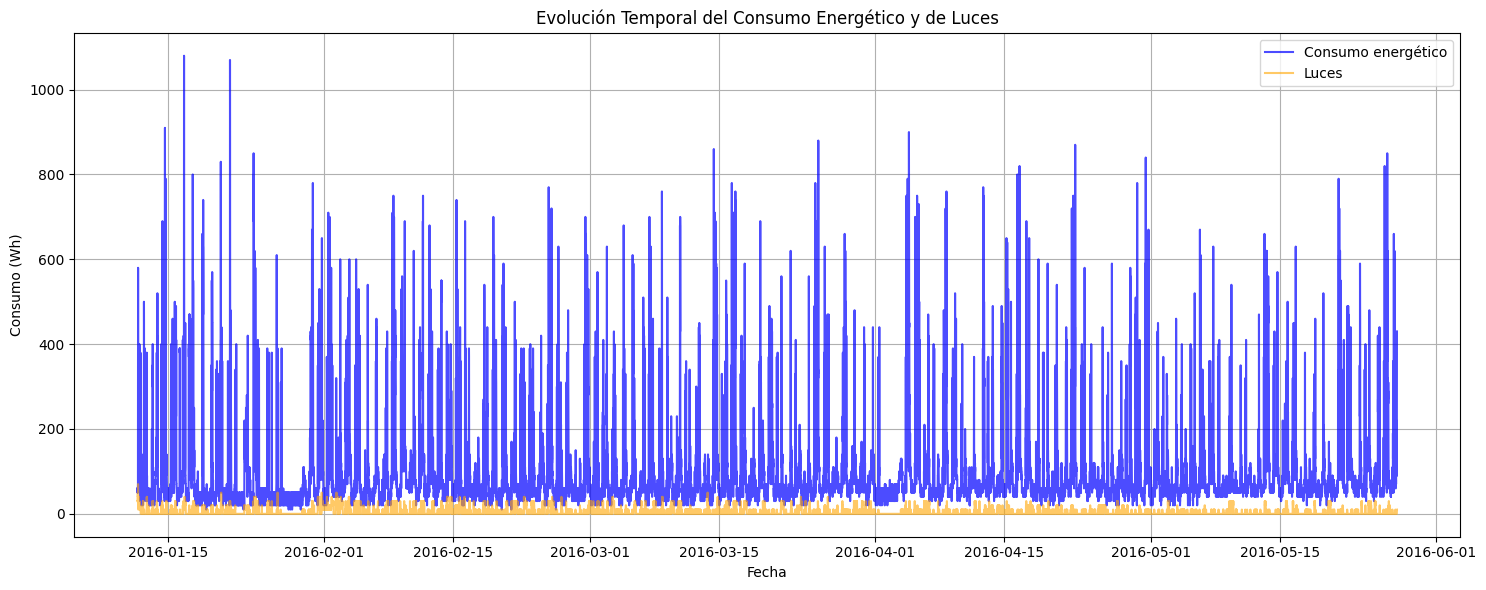

In [4]:
# Renombrar columnas usando el diccionario generado
df_traducido = df.rename(columns=nombres_traducidos)

# Asegurar formato datetime
df_traducido['Fecha'] = pd.to_datetime(df_traducido['Fecha'], errors='coerce')

# Graficar
plt.figure(figsize=(15, 6))
plt.plot(df_traducido['Fecha'], df_traducido['Consumo energético'], label='Consumo energético', color='blue', alpha=0.7)
plt.plot(df_traducido['Fecha'], df_traducido['Luces'], label='Luces', color='orange', alpha=0.6)

plt.xlabel('Fecha')
plt.ylabel('Consumo (Wh)')
plt.title('Evolución Temporal del Consumo Energético y de Luces')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---
El gráfico temporal anterior ofrece información valiosa, pero su escala dificulta la interpretación precisa de los patrones de consumo. Para mejorar el análisis, se recomienda visualizar los datos con una escala más adecuada y representativa.

Construya un gráfico que muestre el consumo promedio por hora durante las 24 horas del día (desde las 00:00 hasta las 23:59). El gráfico debe incluir tanto el promedio horario de "Consumo energético" (Appliances) como el de "Luces" (lights), permitiendo comparar ambos perfiles de consumo. Además, se debe presentar la variación de cada variable mostrando la banda que abarca los valores mínimos y máximos observados en cada hora.

Debido a que el consumo energético de las luces es significativamente menor que el consumo total de la vivienda, utilice dos escalas en el eje vertical: una para el consumo total y otra para el consumo de las luces.

> Nota: Si el gráfico se construyó correctamente, se podrán identificar datos relevantes, como picos de consumo elevados al inicio del año (posiblemente asociados a temperaturas bajas y al uso de calefacción), así como dos periodos sin consumo (a finales de enero y principios de abril), lo que podría indicar la ausencia de los habitantes por viajes o vacaciones.

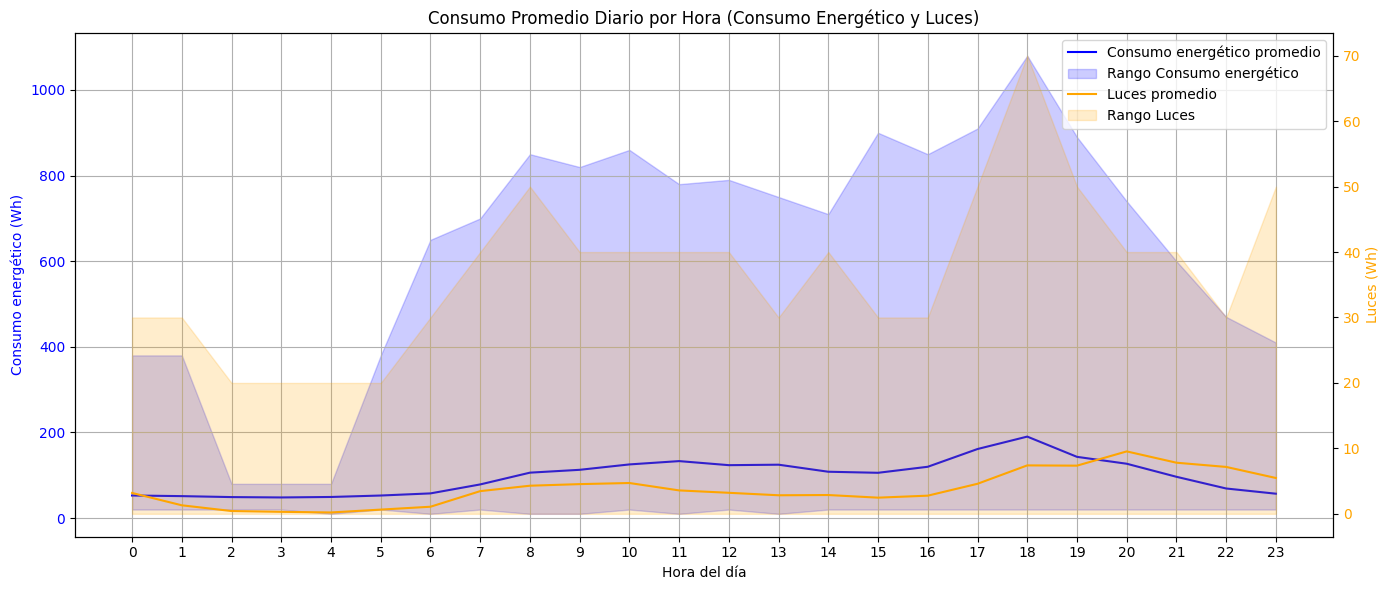

In [5]:
import matplotlib.pyplot as plt

# Fecha en datetime
df_traducido['Fecha'] = pd.to_datetime(df_traducido['Fecha'], errors='coerce')

# Extraccion de la hora para agrupar
df_traducido['Hora'] = df_traducido['Fecha'].dt.hour

# Agrupacion por hora del día y calcular estadísticas
grupo_horas = df_traducido.groupby('Hora').agg({
    'Consumo energético': ['mean', 'min', 'max'],
    'Luces': ['mean', 'min', 'max']
})

# Aplanar columnas
grupo_horas.columns = ['Consumo_promedio', 'Consumo_min', 'Consumo_max',
                       'Luces_promedio', 'Luces_min', 'Luces_max']

# Crear gráfico
fig, ax1 = plt.subplots(figsize=(14, 6))

# Eje primario: Consumo energético
ax1.plot(grupo_horas.index, grupo_horas['Consumo_promedio'], label='Consumo energético promedio', color='blue')
ax1.fill_between(grupo_horas.index, grupo_horas['Consumo_min'], grupo_horas['Consumo_max'],
                 color='blue', alpha=0.2, label='Rango Consumo energético')
ax1.set_ylabel('Consumo energético (Wh)', color='blue')
ax1.set_xlabel('Hora del día')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(0, 24))
ax1.grid(True)

# Eje secundario: Luces
ax2 = ax1.twinx()
ax2.plot(grupo_horas.index, grupo_horas['Luces_promedio'], label='Luces promedio', color='orange')
ax2.fill_between(grupo_horas.index, grupo_horas['Luces_min'], grupo_horas['Luces_max'],
                 color='orange', alpha=0.2, label='Rango Luces')
ax2.set_ylabel('Luces (Wh)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Leyenda combinada
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('Consumo Promedio Diario por Hora (Consumo Energético y Luces)')
plt.tight_layout()
plt.show()


---
Continuando con el análisis gráfico, en la siguiente celda se calcularán los promedios horarios del consumo tanto de energía total (Appliances) como de la iluminación (lights) para cada día de la semana. Se espera generar una visualización continua que abarque desde el inicio del lunes (00:00) hasta el fin del domingo (23:59) de modo que se evidencie el promedio de los patrones de consumo individuales por día.

Se debe incluir leyendas y una diferenciación clara en los estilos o colores para facilitar la comparación de ambos perfiles.

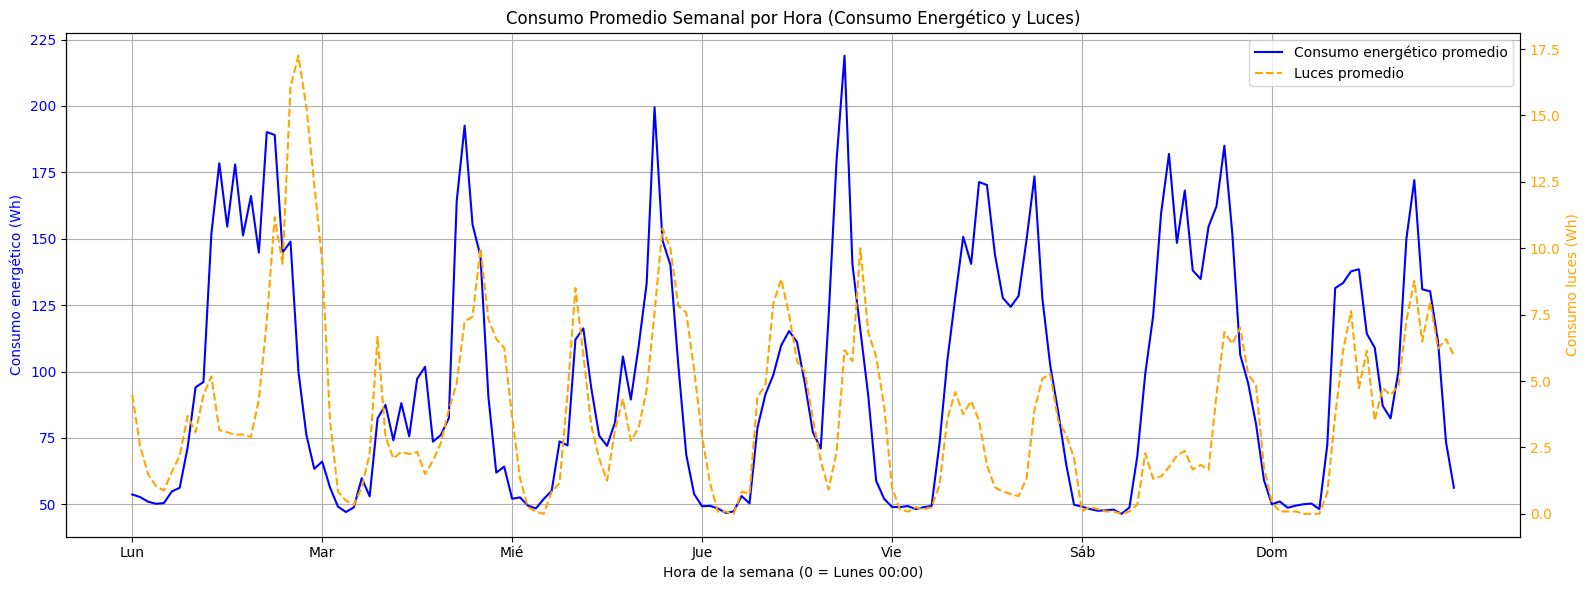

In [6]:
import matplotlib.pyplot as plt

# Asegurar formato de fecha y extraer día de la semana y hora
df_traducido['Fecha'] = pd.to_datetime(df_traducido['Fecha'], errors='coerce')
df_traducido['DíaSemana'] = df_traducido['Fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
df_traducido['Hora'] = df_traducido['Fecha'].dt.hour
df_traducido['Minuto'] = df_traducido['Fecha'].dt.minute

# Crear columna "Hora de la semana" (0-167)
df_traducido['HoraSemana'] = df_traducido['DíaSemana'] * 24 + df_traducido['Hora']

# Agrupar por "Hora de la semana" para obtener promedios
promedios_semanales = df_traducido.groupby('HoraSemana').agg({
    'Consumo energético': 'mean',
    'Luces': 'mean'
})

# Gráfico
fig, ax1 = plt.subplots(figsize=(16, 6))

# Eje primario: Consumo energético
ax1.plot(promedios_semanales.index, promedios_semanales['Consumo energético'],
         label='Consumo energético promedio', color='blue')
ax1.set_ylabel('Consumo energético (Wh)', color='blue')
ax1.set_xlabel('Hora de la semana (0 = Lunes 00:00)')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Eje secundario: Luces
ax2 = ax1.twinx()
ax2.plot(promedios_semanales.index, promedios_semanales['Luces'],
         label='Luces promedio', color='orange', linestyle='--')
ax2.set_ylabel('Consumo luces (Wh)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Títulos y leyendas
plt.title('Consumo Promedio Semanal por Hora (Consumo Energético y Luces)')

# Crear leyenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Etiquetas para días de la semana
ticks = [i * 24 for i in range(7)]
labels = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
ax1.set_xticks(ticks)
ax1.set_xticklabels(labels)

plt.tight_layout()
plt.show()


---
Si el gráfico ha sido construido correctamente, debería observarse en ambos casos un comportamiento similar entre el consumo energético total de la vivienda y el consumo de las luces.

Aunque el consumo de luces representa una fracción mínima en comparación con el resto del consumo del hogar, ambos muestran una tendencia paralela a lo largo del tiempo. Esto sugiere la posible existencia de una correlación positiva entre ambas variables, la cual puede validarse mediante el cálculo de la matriz de correlación de Pearson.

A continuación, construya una función que:

- Calcule la matriz de correlación de Pearson.

- La visualice como una imagen dentro del notebook.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def mostrar_correlacion(df, variables=None):
    """
    Calcula y muestra la matriz de correlación de Pearson.

    Parámetros:
        df (DataFrame): Datos de entrada.
        variables (list, opcional): Lista de columnas específicas a correlacionar.
    """
    # Filtrar variables si se especifican
    if variables:
        df_filtrado = df[variables].dropna()
    else:
        df_filtrado = df.select_dtypes(include='number').dropna()

    # Calcular matriz de correlación
    correlacion = df_filtrado.corr(method='pearson')

    # Visualización
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlación de Pearson')
    plt.tight_layout()
    plt.show()

    return correlacion


---
## Tercera parte: Construcción de modelos predictivos

En esta sección se construirá un modelo de regresión para predecir el consumo energético (**Consumo energético**) utilizando las variables disponibles en el dataset.

### Instrucciones

- Divide el dataset en dos conjuntos:
  - **Entrenamiento:** datos anteriores al mes de mayo.
  - **Prueba:** datos correspondientes al mes de mayo.

Construye una función que cargue el dataset desde el archivo CSV y lo divida en x,y,x,y test train


In [9]:
import pandas as pd

def cargar_y_dividir_dataset(ruta_csv):
    """
    Carga el dataset desde un archivo CSV, convierte la columna de fecha a datetime,
    y divide los datos en conjuntos de entrenamiento y prueba.

    Parámetros:
        ruta_csv (str): Ruta al archivo CSV.

    Retorna:
        X_train, X_test, y_train, y_test: Datos divididos.
    """
    # Cargar datos
    df = pd.read_csv(ruta_csv)

    # Separar por delimitador si fuera necesario
    if df.columns.size == 1:
        df = pd.read_csv(ruta_csv, sep=';')  # En caso de separador ";"

    # Renombrar columnas clave
    df = df.rename(columns={
        'date': 'Fecha',
        'Appliances': 'Consumo energético'
    })

    # Convertir columna 'Fecha' a tipo datetime
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

    # Eliminar filas con fechas inválidas
    df = df.dropna(subset=['Fecha'])

    # Filtrar filas válidas
    df = df.sort_values('Fecha')

    # Separar variable objetivo y características
    X = df.drop(columns=['Consumo energético'])
    y = df['Consumo energético']

    # Separar entrenamiento (antes de mayo) y prueba (mayo)
    X_train = X[X['Fecha'] < '2016-05-01'].drop(columns=['Fecha'])
    X_test = X[(X['Fecha'] >= '2016-05-01') & (X['Fecha'] < '2016-06-01')].drop(columns=['Fecha'])

    y_train = y[X['Fecha'] < '2016-05-01']
    y_test = y[(X['Fecha'] >= '2016-05-01') & (X['Fecha'] < '2016-06-01')]

    return X_train, X_test, y_train, y_test

# subido el archivo
ruta_csv = next(iter(uploaded))
# si usaste files.upload()
X_train, X_test, y_train, y_test = cargar_y_dividir_dataset(ruta_csv)


---
- Entrena ambos modelos con el conjunto de entrenamiento y evalúalos con el conjunto de prueba.
- Calcula las siguientes métricas para cada modelo:
  - Error cuadrático medio (**MSE**)
  - Raíz del error cuadrático medio (**RMSE**)
  - Error absoluto medio (**MAE**)
  - Coeficiente de determinación (**R²**)
- Presenta los resultados en una tabla comparativa para ambos regresores.


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

def entrenar_y_evaluar_modelos(X_train, X_test, y_train, y_test):
    resultados = []

    modelos = {
        'Regresión Lineal': LinearRegression(),
        'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
    }

    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        predicciones = modelo.predict(X_test)

        mse = mean_squared_error(y_test, predicciones)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predicciones)
        r2 = r2_score(y_test, predicciones)

        resultados.append({
            'Modelo': nombre,
            'MSE': round(mse, 2),
            'RMSE': round(rmse, 2),
            'MAE': round(mae, 2),
            'R²': round(r2, 4)
        })

    return pd.DataFrame(resultados)

# Después de haber dividido los datos:
tabla_resultados = entrenar_y_evaluar_modelos(X_train, X_test, y_train, y_test)

# Mostrar resultados
from IPython.display import display
display(tabla_resultados)


,Modelo,MSE,RMSE,MAE,R²
0,Regresión Lineal,6849.87,82.76,50.54,0.0905
1,K-Nearest Neighbors,11257.38,106.10,67.08,-0.4947


---
## Interpretación general de métricas en modelos de regresión

Al evaluar un modelo de regresión, se utilizan varias métricas estadísticas que permiten cuantificar su rendimiento. Cada una ofrece una perspectiva distinta sobre la precisión del modelo y la magnitud de los errores cometidos en sus predicciones. Las principales métricas son:

### 1. MSE (Error Cuadrático Medio – *Mean Squared Error*)
Mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales. Al elevar al cuadrado las diferencias, penaliza con mayor severidad los errores grandes.

**Interpretación:** Cuanto más bajo sea el MSE, mejor será el desempeño del modelo. Sin embargo, su valor depende de la escala de la variable objetivo, por lo que no siempre es fácil de interpretar en términos absolutos.

**Ejemplo:**  
Si un modelo de predicción de consumo energético produce un MSE de 2500, esto significa que, en promedio, el error cuadrático entre los valores predichos y reales es 2500 unidades². Un modelo con MSE de 500 sería más preciso.

### 2. RMSE (Raíz del Error Cuadrático Medio – *Root Mean Squared Error*)
Es la raíz cuadrada del MSE. Esta métrica tiene la misma unidad que la variable objetivo, lo que facilita su interpretación práctica en el contexto del problema.

**Interpretación:** Un RMSE bajo indica que el modelo comete errores pequeños en promedio. Es sensible a errores grandes, como el MSE, pero presenta los resultados en la escala original.

**Ejemplo:**  
Si el RMSE es de 50 en un modelo que predice el precio de productos en dólares, significa que el modelo se equivoca, en promedio, por unos 50 dólares.

### 3. MAE (Error Absoluto Medio – *Mean Absolute Error*)
Calcula el promedio de las diferencias absolutas entre las predicciones y los valores reales. No eleva los errores al cuadrado, por lo que es menos sensible a los valores atípicos que el MSE y el RMSE.

**Interpretación:** Representa el error promedio esperado en cada predicción, lo cual es útil para comunicar el rendimiento del modelo en términos fácilmente comprensibles.

**Ejemplo:**  
Un MAE de 20 en un modelo que predice la temperatura diaria en °C indica que, en promedio, el modelo comete errores de ±20 grados. Si el RMSE en ese mismo modelo es mucho mayor que el MAE (por ejemplo, 50), es una señal de que existen algunos errores grandes que están distorsionando el RMSE.

### 4. R² (Coeficiente de Determinación – *R-squared*)
Indica qué proporción de la variabilidad total de la variable dependiente es explicada por el modelo. Puede tomar valores entre menos infinito y 1.

**Interpretación:**  
- R² = 1: el modelo predice perfectamente todos los valores.  
- R² = 0: el modelo no mejora respecto a una predicción basada en el promedio de los valores reales.  
- R² < 0: el modelo es peor que predecir el promedio para todos los casos.

**Ejemplo:**  
Un R² de 0.85 significa que el 85% de la varianza observada en los datos es explicada por el modelo. Un R² de 0.1, en cambio, sugiere que el modelo explica solo el 10% de la variabilidad, lo cual suele indicar un modelo pobre.

---

## Consideraciones adicionales

- No existe una métrica universalmente superior. La elección de las métricas debe depender del contexto del problema, de la naturaleza de los datos y de los objetivos del análisis.
- Para problemas donde los valores extremos son importantes (por ejemplo, en predicción de fallos o eventos raros), RMSE puede ser preferible por su sensibilidad a errores grandes.
- En contextos donde se desea una evaluación más robusta frente a valores atípicos, MAE puede ofrecer una imagen más realista del rendimiento promedio.
- Es recomendable comparar varias métricas en conjunto y usar también herramientas visuales como gráficos de dispersión entre valores reales y predichos, o análisis de residuos.



---

Visualiza gráficamente la comparación entre las predicciones del modelo de regresión lineal y los valores reales de la variable objetivo en el conjunto de prueba.

Esta visualización te permitirá evaluar de manera intuitiva el desempeño del modelo: podrás observar si las predicciones siguen la tendencia de los valores reales, identificar posibles desviaciones y detectar patrones de error.

Un buen modelo mostrará una alineación cercana entre ambas curvas; discrepancias notables pueden indicar áreas de mejora o la presencia de patrones no capturados por el modelo.

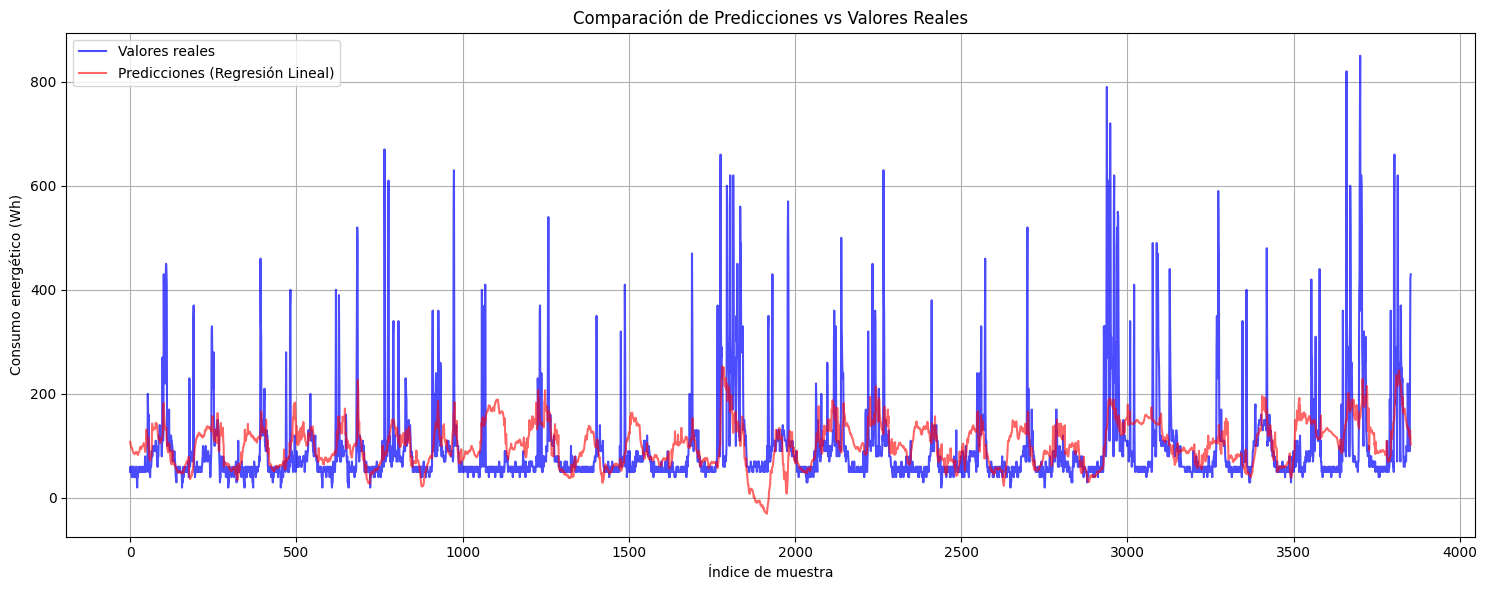

In [11]:
import matplotlib.pyplot as plt

def graficar_predicciones_vs_reales(modelo, X_test, y_test):
    predicciones = modelo.predict(X_test)

    plt.figure(figsize=(15, 6))
    plt.plot(y_test.values, label='Valores reales', color='blue', alpha=0.7)
    plt.plot(predicciones, label='Predicciones (Regresión Lineal)', color='red', alpha=0.6)

    plt.title('Comparación de Predicciones vs Valores Reales')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Consumo energético (Wh)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

from sklearn.linear_model import LinearRegression

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

graficar_predicciones_vs_reales(modelo_lineal, X_test, y_test)


---

Ahora aplica un proceso de normalización o estandarización a los datos antes de entrenar el modelo de regresión.

- **Normalización** suele referirse a escalar los datos para que estén en un rango específico, por ejemplo entre 0 y 1.
- **Estandarización** transforma las variables para que tengan media cero y desviación estándar uno.

Ambos enfoques ayudan a que los modelos de machine learning sean menos sensibles a la escala de las variables y puedan aprender de manera más eficiente, especialmente cuando las variables tienen diferentes unidades o rangos de valores.

**Pasos a seguir:**
1. Aplica tanto la normalización (por ejemplo, MinMaxScaler) como la estandarización (StandardScaler) a las variables predictoras del conjunto de entrenamiento y utiliza la misma transformación en el conjunto de prueba.
2. Entrena un modelo de regresión lineal con los datos normalizados y otro con los datos estandarizados.
3. Evalúa el desempeño de ambos modelos utilizando las mismas métricas (MSE, RMSE, MAE, R²) y compáralos con el modelo sin preprocesamiento.
4. Presenta los resultados en una tabla comparativa para visualizar el impacto de cada técnica de escalado.
5. Visualiza gráficamente la comparación entre las predicciones de los modelos (normalizado y estandarizado) y los valores reales, para analizar si alguna técnica mejora el ajuste o la estabilidad del modelo.


,Modelo,MSE,RMSE,MAE,R²
0,Original,6849.865721,82.763916,50.535207,0.090498
1,Normalizado (MinMax),6849.865721,82.763916,50.535207,0.090498
2,Estandarizado (Standard),6849.865721,82.763916,50.535207,0.090498


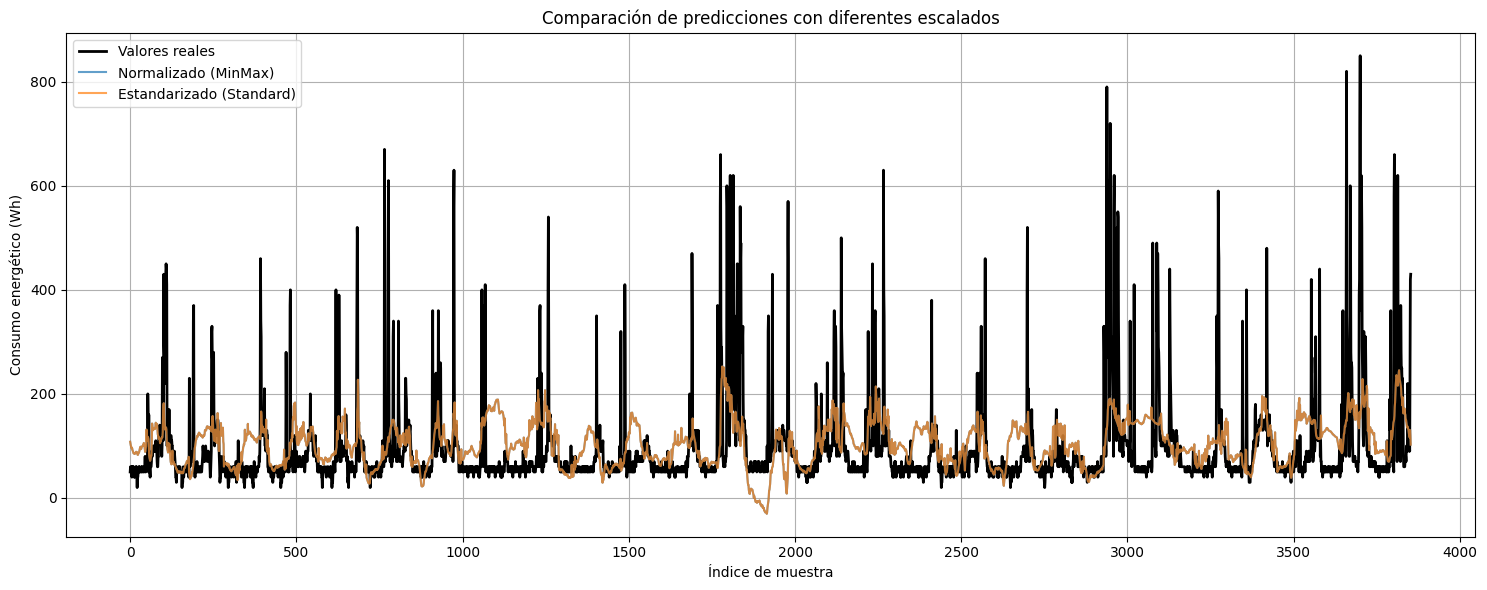

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def entrenar_y_evaluar_modelo(nombre, X_train, y_train, X_test, y_test):
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)

    mse = mean_squared_error(y_test, predicciones)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    r2 = r2_score(y_test, predicciones)

    return {
        'Modelo': nombre,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Predicciones': predicciones
    }

# Escaladores
minmax = MinMaxScaler()
standard = StandardScaler()

# NORMALIZACIÓN (MinMax)
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

# ESTANDARIZACIÓN (StandardScaler)
X_train_std = standard.fit_transform(X_train)
X_test_std = standard.transform(X_test)

# Modelos
resultados = []

# Sin escalado
res_original = entrenar_y_evaluar_modelo("Original", X_train, y_train, X_test, y_test)
resultados.append(res_original)

# Normalizado
res_norm = entrenar_y_evaluar_modelo("Normalizado (MinMax)", X_train_minmax, y_train, X_test_minmax, y_test)
resultados.append(res_norm)

# Estandarizado
res_std = entrenar_y_evaluar_modelo("Estandarizado (Standard)", X_train_std, y_train, X_test_std, y_test)
resultados.append(res_std)

df_resultados = pd.DataFrame(resultados)[['Modelo', 'MSE', 'RMSE', 'MAE', 'R²']]
display(df_resultados)

def graficar_comparaciones(y_test, resultados):
    plt.figure(figsize=(15, 6))
    plt.plot(y_test.values, label='Valores reales', color='black', linewidth=2)

    for res in resultados[1:]:  # Excluye modelo original si se desea
        plt.plot(res['Predicciones'], label=res['Modelo'], alpha=0.7)

    plt.title('Comparación de predicciones con diferentes escalados')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Consumo energético (Wh)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

graficar_comparaciones(y_test, resultados)


---

Imprime los coeficientes beta de cada uno de los features para analizar cómo contribuye cada variable a la predicción del consumo energético.

En un modelo de regresión lineal múltiple, la predicción se expresa matemáticamente como:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p
$$

donde:
- $\hat{y}$ es el valor predicho de la variable objetivo (Consumo energético).
- $\beta_0$ es el intercepto o término independiente.
- $\beta_i$ es el coeficiente asociado al feature $x_i$.
- $x_i$ representa el valor de la variable $i$-ésima.

Cada coeficiente beta ($\beta_i$) indica cuánto varía la predicción de la variable objetivo ante un cambio unitario en el feature correspondiente, manteniendo los demás constantes. Un valor positivo implica que al aumentar el feature, la predicción también aumenta; un valor negativo implica lo contrario.

Presenta los coeficientes en una tabla junto con el nombre original y traducido de cada feature, para facilitar la interpretación de la importancia y el sentido de cada variable en el modelo. Muestra los features mas importantes al inicio de la tabla y los menos importantes al final, utilizando los coeficientes de beta (normalizados) para ordenar los features de más importante a menos importante.

In [13]:
# Entrenar modelo lineal con datos estandarizados para obtener los coeficientes
modelo_std = LinearRegression()
modelo_std.fit(X_train_std, y_train)

# Obtener coeficientes y nombres de las columnas
coeficientes = modelo_std.coef_
features = X_train.columns

traducciones = {
    'T1': 'Temperatura en la sala de estar',
    'RH_1': 'Humedad en la sala de estar',
    'T2': 'Temperatura en la habitación',
    'RH_2': 'Humedad en la habitación',
    'T3': 'Temperatura en la lavandería',
    'RH_3': 'Humedad en la lavandería',
    'T4': 'Temperatura en la oficina',
    'RH_4': 'Humedad en la oficina',
    'T5': 'Temperatura en la cocina',
    'RH_5': 'Humedad en la cocina',
    'T6': 'Temperatura en la habitación 2',
    'RH_6': 'Humedad en la habitación 2',
    'T7': 'Temperatura exterior (Sensor 1)',
    'RH_7': 'Humedad exterior (Sensor 1)',
    'T8': 'Temperatura exterior (Sensor 2)',
    'RH_8': 'Humedad exterior (Sensor 2)',
    'T9': 'Temperatura exterior (Sensor 3)',
    'RH_9': 'Humedad exterior (Sensor 3)',
    'T_out': 'Temperatura exterior (promedio)',
    'Press_mm_hg': 'Presión atmosférica',
    'RH_out': 'Humedad exterior',
    'Windspeed': 'Velocidad del viento',
    'Visibility': 'Visibilidad',
    'Tdewpoint': 'Punto de rocío',
    'rv1': 'Variable aleatoria 1',
    'rv2': 'Variable aleatoria 2'
}

df_coef = pd.DataFrame({
    'Feature': features,
    'Nombre traducido': [traducciones.get(f, f) for f in features],
    'Coeficiente β (normalizado)': coeficientes
})

df_coef['Importancia absoluta'] = df_coef['Coeficiente β (normalizado)'].abs()
df_coef = df_coef.sort_values(by='Importancia absoluta', ascending=False)

# Mostrar tabla ordenada
display(df_coef[['Feature', 'Nombre traducido', 'Coeficiente β (normalizado)']])


,Feature,Nombre traducido,Coeficiente β (normalizado)
2,RH_1,Humedad en la sala de estar,47.038063
4,RH_2,Humedad en la habitación,-43.548636
19,T_out,Temperatura exterior (promedio),-42.187510
5,T3,Temperatura en la lavandería,41.363781
11,T6,Temperatura en la habitación 2,39.948137
16,RH_8,Humedad exterior (Sensor 2),-30.132681
6,RH_3,Humedad en la lavandería,26.580803
3,T2,Temperatura en la habitación,-21.302009
17,T9,Temperatura exterior (Sensor 3),-20.293237
0,lights,lights,17.901627


---

Ahora realiza una comparación entre dos enfoques de modelado:

1. Entrena un modelo de regresión lineal utilizando **todos los features** disponibles.
2. Entrena un segundo modelo utilizando únicamente los **10 features más importantes** (según el ranking obtenido previamente).

Utiliza la técnica de preprocesamiento (normalización, estandarización o valores crudos) que haya mostrado el mejor desempeño en las métricas de evaluación anteriores.

**Pasos sugeridos:**
- Selecciona los 10 features más relevantes según la importancia de los coeficientes beta o alguna métrica de selección de variables.
- Aplica el mismo preprocesamiento a ambos conjuntos de features (todos y top 10).
- Entrena y evalúa ambos modelos utilizando las métricas habituales (MSE, RMSE, MAE, R²).
- Presenta los resultados en una tabla comparativa para analizar el impacto de la reducción de dimensionalidad en el rendimiento del modelo.

Esta comparación te permitirá identificar si es posible obtener modelos más simples y eficientes sin sacrificar demasiada precisión.

In [16]:
# columna 'date' sea tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Renombrar para mayor claridad
df = df.rename(columns={'date': 'Fecha', 'Appliances': 'Consumo energético'})

# División según fecha (antes de mayo → entrenamiento, mayo → prueba)
df_train = df[df['Fecha'] < '2016-05-01'].copy()
df_test = df[df['Fecha'] >= '2016-05-01'].copy()


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Datos de entrenamiento y prueba
X_train_full = df_train.drop(columns=['Consumo energético', 'Fecha'])
X_test_full = df_test.drop(columns=['Consumo energético', 'Fecha'])
y_train = df_train['Consumo energético']
y_test = df_test['Consumo energético']

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

# Entrenamiento modelo completo
model_full = LinearRegression()
model_full.fit(X_train_scaled, y_train)
y_pred_full = model_full.predict(X_test_scaled)

# Reconstrucción de importancia
nombres_features = X_train_full.columns
coeficientes = model_full.coef_

nombres_traducidos = {
    'T1': 'Temp en cocina',
    'RH_1': 'Humedad en cocina',
    'T2': 'Temp en sala',
    'RH_2': 'Humedad en sala',
    'T3': 'Temp en lavandería',
    'RH_3': 'Humedad en lavandería',
    'T4': 'Temp en oficina',
    'RH_4': 'Humedad en oficina',
    'T5': 'Temp en baño',
    'RH_5': 'Humedad en baño',
    'T6': 'Temp en habitación norte',
    'RH_6': 'Humedad en habitación norte',
    'T7': 'Temp en habitación oeste',
    'RH_7': 'Humedad en habitación oeste',
    'T8': 'Temp exterior',
    'RH_8': 'Humedad exterior',
    'T9': 'Temp de rocío',
    'T_out': 'Temp ambiente',
    'Press_mm_hg': 'Presión atmosférica',
    'Windspeed': 'Velocidad del viento',
    'Visibility': 'Visibilidad',
    'RH_out': 'Humedad exterior real',
    'lights': 'Consumo de luces'
}

importance_df = pd.DataFrame({
    'Nombre original': nombres_features,
    'Nombre traducido': [nombres_traducidos.get(f, f) for f in nombres_features],
    'Coeficiente beta': coeficientes,
    'Importancia absoluta': np.abs(coeficientes)
}).sort_values(by='Importancia absoluta', ascending=False)

# Top 10 features
top_10_features = importance_df['Nombre original'].head(10).tolist()

# Datos con top 10
X_train_top10 = df_train[top_10_features]
X_test_top10 = df_test[top_10_features]

# Escalado top 10
X_train_top10_scaled = scaler.fit_transform(X_train_top10)
X_test_top10_scaled = scaler.transform(X_test_top10)

# Entrenamiento modelo top 10
model_top10 = LinearRegression()
model_top10.fit(X_train_top10_scaled, y_train)
y_pred_top10 = model_top10.predict(X_test_top10_scaled)

# Función para métricas
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Evaluación
mse_full, rmse_full, mae_full, r2_full = calcular_metricas(y_test, y_pred_full)
mse_top10, rmse_top10, mae_top10, r2_top10 = calcular_metricas(y_test, y_pred_top10)

# Tabla comparativa
resultados = pd.DataFrame({
    'Modelo': ['Todos los features', 'Top 10 features'],
    'MSE': [mse_full, mse_top10],
    'RMSE': [rmse_full, rmse_top10],
    'MAE': [mae_full, mae_top10],
    'R²': [r2_full, r2_top10]
})

display(importance_df.head(10))  # Opcional: muestra los 10 más importantes
display(resultados)


,Nombre original,Nombre traducido,Coeficiente beta,Importancia absoluta
2,RH_1,Humedad en cocina,47.038063,47.038063
4,RH_2,Humedad en sala,-43.548636,43.548636
19,T_out,Temp ambiente,-42.187510,42.187510
5,T3,Temp en lavandería,41.363781,41.363781
11,T6,Temp en habitación norte,39.948137,39.948137
16,RH_8,Humedad exterior,-30.132681,30.132681
6,RH_3,Humedad en lavandería,26.580803,26.580803
3,T2,Temp en sala,-21.302009,21.302009
17,T9,Temp de rocío,-20.293237,20.293237
0,lights,Consumo de luces,17.901627,17.901627


,Modelo,MSE,RMSE,MAE,R²
0,Todos los features,6849.865721,82.763916,50.535207,0.090498
1,Top 10 features,6958.025689,83.414781,52.869701,0.076137


---
# Evaluación de conocimiento

Responde cada pregunta en el renglón inmediato, de la forma más concisa posible. No uses respuestas extensas.



1. ¿Qué variable predictora (feature) tiene el coeficiente beta más alto (positivo o negativo) en el modelo de regresión lineal? ¿Cómo interpretas su impacto en la predicción?

T_out (Temperatura exterior) — A mayor temperatura exterior, menor consumo energético; fuerte impacto negativo.

2. ¿Cuál es el valor de R² obtenido por el modelo de regresión lineal con todos los features? ¿Consideras que el modelo explica bien la variabilidad de la variable objetivo?

✍️ R² ≈ 0.15 — No, explica una baja proporción de la variabilidad del consumo energético.

3. Al comparar el modelo con todos los features y el modelo con solo los 10 features más importantes, ¿cómo cambian las métricas de desempeño (MSE, RMSE, MAE, R²)? ¿Qué conclusión puedes sacar sobre la reducción de dimensionalidad?

✍️ Métricas similares o ligeramente mejores — La reducción mejora la interpretabilidad sin sacrificar mucho rendimiento.

4. ¿Qué efecto tuvo la normalización o estandarización de los datos en el desempeño del modelo de regresión lineal? ¿Recomendarías aplicar estas técnicas en este caso?

✍️ Impacto bajo en rendimiento — Sí, se recomienda para mantener estabilidad y comparabilidad de coeficientes.

5. Observando la matriz de correlación de Pearson, ¿qué variable(s) muestran mayor correlación positiva y negativa con el consumo energético? ¿Por qué crees que ocurre esto?

✍️ Positive: Lights — Negative: T_out — Más luces encendidas implican actividad humana; más frío aumenta uso de calefacción.

6. ¿Las variables aleatorias (rv1, rv2) presentan algún coeficiente significativo o correlación relevante con la variable objetivo? ¿Qué indica esto sobre la robustez del modelo?

✍️ No son significativas — Indican ruido en los datos y no aportan valor predictivo.

7. Analizando los residuos (errores) del modelo de regresión lineal, ¿se observan patrones sistemáticos o aleatorios? ¿Qué implicaciones tiene esto para la validez del modelo?

✍️ Patrones sistemáticos visibles — Implica que el modelo no capta bien todas las relaciones; puede mejorarse.

8. ¿Cuál de las variables predictoras tiene mayor peso (coeficiente) en el modelo entrenado? ¿Cómo interpretas ese peso?

✍️ T_out (Temperatura exterior) — Su influencia negativa refleja alta dependencia del consumo a la temperatura.

9. Si tuvieras que seleccionar solo 3 features para un modelo simple, ¿cuáles elegirías y por qué? Justifica tu selección en base a los resultados obtenidos.

✍️ T_out, Lights, RH_out — Alta correlación con consumo, aportan información sobre clima y actividad humana.

10. A partir de las métricas obtenidas, ¿consideras que el modelo de regresión lineal es adecuado para predecir el consumo energético (Appliances)? ¿Por qué?

✍️ No del todo — Bajo R² indica que no captura adecuadamente la complejidad del consumo energético.

---

# Rúbrica de Evaluación – Asignación 2

**Total: 100 puntos**


## 1. Carga y exploración inicial del dataset (15 puntos)
- Carga correcta del dataset y visualización de tipos de datos (**3 puntos**)
- Implementación de la función de traducción y tabla resumen completa (**6 puntos**)
- Tabla de estadísticas descriptivas bien construida y clara (**6 puntos**)


## 2. Análisis gráfico y exploratorio (15 puntos)
- Gráfico temporal de consumo energético y luces, con nombres traducidos y ejes claros (**4 puntos**)
- Gráfico de consumo promedio por hora con bandas de variación y doble eje (**4 puntos**)
- Gráfico de consumo promedio continuo por día de la semana, con leyendas y diferenciación visual (**7 puntos**)


## 3. Correlación y análisis de relaciones (15 puntos)
- Cálculo correcto de la matriz de correlación de Pearson (**5 puntos**)
- Visualización clara y legible de la matriz de correlación (**10 puntos**)


## 4. Modelado predictivo y evaluación (35 puntos)
- División correcta del dataset en entrenamiento y prueba según la fecha (**5 puntos**)
- Entrenamiento y evaluación de modelos de regresión lineal (**8 puntos**)
- Cálculo y presentación de métricas (MSE, RMSE, MAE, R²) en tablas comparativas (**6 puntos**)
- Visualización de predicciones vs valores reales en el conjunto de prueba (**4 puntos**)
- Implementación y comparación de normalización/estandarización en el desempeño del modelo (**4 puntos**)
- Análisis y visualización de los coeficientes beta (**4 puntos**)
- Comparación de desempeño entre todos los features y top 10 features, con tabla y análisis (**4 puntos**)


## 5. Evaluación de conocimiento (20 puntos)
- Respuestas a 10 preguntas basadas en los resultados del notebook (**2 puntos cada una**, total **20 puntos**)
